In [1]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/
#Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn import datasets, neighbors
from sklearn.model_selection import TimeSeriesSplit
import pickle
import scipy
import time

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Function to pickle in an object:
def openPickleFile(name): #name = the pickle file name, this should be passed as a string inside " ".
    global temp
    temp = pickle.load(open(name + ".pickle","rb"))
    return temp

#Function to pickle out an object.
def savePickleFile(obj,name):
    pickle.dump(obj, open(name + ".pickle","wb"))

In [3]:
openPickleFile("y_train")
y_train = temp
print(y_train.shape)
print(y_train.dtype)

(80000,)
int64


In [4]:
openPickleFile("y_test")
y_test = temp
print(y_test.shape)
print(y_test.dtype)


(20000,)
int64


In [5]:
#Function to count no. of unique values in variable of any datatype.
def unique_count(a):
    unique, inverse = np.unique(a, return_inverse=True)
    count = np.zeros(len(unique), np.int)
    np.add.at(count, inverse, 1)
    return np.vstack(( unique, count)).T
# 1. CV on Standardized data for Unigrams
unique_count(y_train)

array([[    0, 11757],
       [    1, 68243]], dtype=int64)

# 1. CV on Standardized data for Bigrams

In [6]:
openPickleFile("X_train")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000,)
object


In [7]:
openPickleFile("X_test")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000,)
object


**Vectorization of X_train**

In [8]:
count_vect = CountVectorizer(ngram_range=(1,2) ) #in scikit-learn
fit = count_vect.fit(X_train) #1st fitting X_train for BoW bigrams.
final_bigram_counts_train = fit.transform(X_train) # Then transforming X_train using the calculated fit.
print("the type of count vectorizer ",type(final_bigram_counts_train))
print("the shape of out text BOW vectorizer ",final_bigram_counts_train.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts_train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (80000, 1035586)
the number of unique words including both unigrams and bigrams  1035586


In [9]:
standardized_bigrams_train = MaxAbsScaler().fit_transform(final_bigram_counts_train)
standardized_bigrams_train

<80000x1035586 sparse matrix of type '<class 'numpy.float64'>'
	with 5203377 stored elements in Compressed Sparse Row format>

In [10]:
#saving unigram sparse matrix.
savePickleFile(standardized_bigrams_train, "X_train_bigram_sparse")

**Transformation of X_test**

In [11]:
#BoW for X_test
final_bigram_counts_test = fit.transform(X_test) # Then transforming X_train using the calculated fit.
print("the type of count vectorizer ",type(final_bigram_counts_test))
print("the shape of out text BOW vectorizer ",final_bigram_counts_test.get_shape())
print("the number of unique words ", final_bigram_counts_test.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (20000, 1035586)
the number of unique words  1035586


In [12]:
standardized_bigrams_test = MaxAbsScaler().fit_transform(final_bigram_counts_test)
standardized_bigrams_test

<20000x1035586 sparse matrix of type '<class 'numpy.float64'>'
	with 1155232 stored elements in Compressed Sparse Row format>

In [13]:
#saving unigram sparse matrix.
savePickleFile(standardized_bigrams_test, "X_test_bigram_sparse")

In [14]:
openPickleFile("X_train_bigram_sparse")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000, 1035586)
float64


In [15]:
openPickleFile("X_test_bigram_sparse")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000, 1035586)
float64


In [16]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [17]:
time_start = time.time()

tuned_parameters = [{'C': [10**i for i in range(-2,6,2)]}]

#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5, n_jobs=6)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

print ('CV for Bigrams in range(10e-2, 10e+6) done! Time elapsed: {} seconds'.format(time.time()-time_start))

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9469005140610824
CV for Bigrams in range(10e-2, 10e+6) done! Time elapsed: 112.00497674942017 seconds


In [18]:
report(model.cv_results_)

Model with rank: 1
Mean validation score: 0.954 (std: 0.001)
Parameters: {'C': 10000}

Model with rank: 2
Mean validation score: 0.954 (std: 0.002)
Parameters: {'C': 100}

Model with rank: 3
Mean validation score: 0.952 (std: 0.002)
Parameters: {'C': 1}



**RandomizedSearchCV**

In [19]:
y_train =y_train.astype(float)

In [20]:
y_train.dtype

dtype('float64')

In [21]:
time_start = time.time()

tuned_parameters = {'C': [10**i for i in range(-4,4,1)]} #params should be passed as a dict not as list of dict.

#Using RandomizedSearchCV
model =  RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5, n_jobs=6, random_state = 12, n_iter=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

print ('CV for Bigrams in range(10e-4, 10e+4) done! Time elapsed: {} seconds'.format(time.time()-time_start))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9465284284980202
CV for Bigrams in range(10e-4, 10e+4) done! Time elapsed: 86.25825500488281 seconds


In [22]:
report(model.cv_results_)

Model with rank: 1
Mean validation score: 0.954 (std: 0.002)
Parameters: {'C': 100}

Model with rank: 2
Mean validation score: 0.952 (std: 0.002)
Parameters: {'C': 1}

Model with rank: 3
Mean validation score: 0.924 (std: 0.001)
Parameters: {'C': 0.01}



In [23]:
# ============================== Logistic Regression with C = optimal_C ===============================================
#optimal_cv_result = sorted(model.cv_results_['mean_test_score'], reverse=True)
optimal_cv_result = max(model.cv_results_['mean_test_score'])
acc = optimal_cv_result * float(100)
print('\nThe CV F1 score of the Logistic Regression is %f%%' % (acc))

# evaluate accuracy
acc = model.score(X_test, y_test) * 100
print('\nThe Test F1 score of the Logistic Regression for C = %f is %f%%' % (model.best_params_['C'], acc))


The CV F1 score of the Logistic Regression is 95.428368%

The Test F1 score of the Logistic Regression for C = 100.000000 is 94.652843%


**Precision, Recall and F1 score report**

In [24]:
pred = model.predict(X_test)

from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.87      0.65      0.74      3943
    class 1       0.92      0.98      0.95     16057

avg / total       0.91      0.91      0.91     20000



**Confusion matrix**

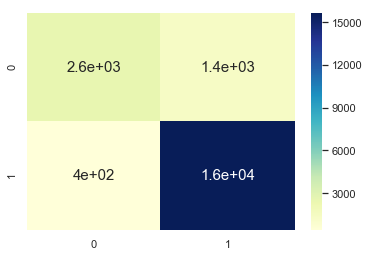

In [25]:
import seaborn as sns; sns.set()
cnf_matrix = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(cnf_matrix)

#sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="YlGnBu")# font size and colors selection.

**ROC AUC curve**

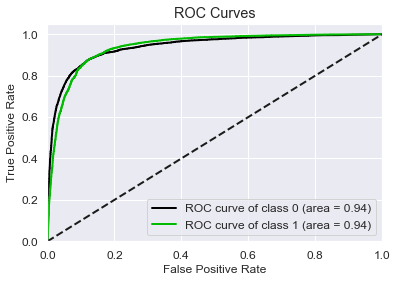

In [26]:
import scikitplot as skplt

LR_optimal = LogisticRegression(C=model.best_params_['C'], penalty='l1').fit(X_train, y_train)

predicted_probas = LR_optimal.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas, plot_micro=False, plot_macro=False)
plt.show()

## 1.1. Feature importance for both positive and negative features.

### Top 25 Bigrams.

In [27]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print ("\tTop {} Negative features\tTop {} Positive features".format(n, n))
    print ("\t------------------------\t------------------------")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [28]:
show_most_informative_features(count_vect, LR_optimal, n=25)

	Top 25 Negative features	Top 25 Positive features
	------------------------	------------------------
	-21.8879	worst          		38.2759	best           
	-21.7731	two star       		33.3255	awesom         
	-20.9609	return         		32.3100	love           
	-20.2468	disappoint     		30.3397	great          
	-20.0359	horribl        		29.4717	delici         
	-19.6591	disgust        		26.9093	perfect        
	-16.7616	vomit          		25.2024	help           
	-16.7111	never buy      		22.9027	amaz           
	-16.5704	terribl        		22.2272	good           
	-16.1352	mislead        		20.3645	excel          
	-16.1167	aw             		18.5897	addict         
	-15.5982	stale          		18.3384	skeptic        
	-14.7409	probabl fresh  		17.0064	nice           
	-14.4824	moldi          		15.8115	yum            
	-14.4821	schar          		15.5541	high recommend 
	-14.3961	bland          		15.5384	energi         
	-13.8611	mayb           		15.5353	uniqu          
	-13.5539	chew rope      		15.0

# 2. CV on Standardized data for TFIDF

In [29]:
openPickleFile("X_train")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000,)
object


In [30]:
openPickleFile("X_test")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000,)
object


**Vectorization of X_train**

In [31]:
time_start = time.time()

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
fit = tf_idf_vect.fit(X_train)
final_tf_idf_train = fit.transform(X_train)
print("the type of count vectorizer ",type(final_tf_idf_train))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_train.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf_train.get_shape()[1])

print ('TfidfVectorizer done! Time elapsed: {} seconds'.format(time.time()-time_start))

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (80000, 1035586)
the number of unique words including both unigrams and bigrams  1035586
TfidfVectorizer done! Time elapsed: 16.531789541244507 seconds


In [32]:
standardized_tfidf_train = MaxAbsScaler().fit_transform(final_tf_idf_train)
standardized_tfidf_train

<80000x1035586 sparse matrix of type '<class 'numpy.float64'>'
	with 5203377 stored elements in Compressed Sparse Row format>

In [33]:
#saving unigram sparse matrix.
savePickleFile(standardized_tfidf_train, "X_train_TFIDF_sparse")

**Transformation of X_test**

In [34]:
time_start = time.time()

final_tf_idf_test = fit.transform(X_test)
print("the type of count vectorizer ",type(final_tf_idf_test))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_test.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf_test.get_shape()[1])

print ('TfidfVectorizer done! Time elapsed: {} seconds'.format(time.time()-time_start))

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (20000, 1035586)
the number of unique words including both unigrams and bigrams  1035586
TfidfVectorizer done! Time elapsed: 1.7064361572265625 seconds


In [35]:
standardized_tfidf_test = MaxAbsScaler().fit_transform(final_tf_idf_test)
standardized_tfidf_test

<20000x1035586 sparse matrix of type '<class 'numpy.float64'>'
	with 1155232 stored elements in Compressed Sparse Row format>

In [36]:
#saving unigram sparse matrix.
savePickleFile(standardized_tfidf_test, "X_test_TFIDF_sparse")

In [37]:
openPickleFile("X_train_TFIDF_sparse")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000, 1035586)
float64


In [38]:
openPickleFile("X_test_TFIDF_sparse")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000, 1035586)
float64


**RandomizedSearchCV**

In [39]:
y_train =y_train.astype(float)

In [40]:
y_train.dtype

dtype('float64')

In [41]:
time_start = time.time()

tuned_parameters = {'C': [10**i for i in range(-5,5,1)]} #params should be passed as a dict not as list of dict.

#Using RandomizedSearchCV
model =  RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5, n_jobs=6, random_state = 12, n_iter=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

print ('CV for TFIDF in range(10e-5, 10e+5) done! Time elapsed: {} seconds'.format(time.time()-time_start))

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9489758817113078
CV for TFIDF in range(10e-5, 10e+5) done! Time elapsed: 66.30705428123474 seconds


In [42]:
#print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % (time() - start, len(results['params'])))
report(model.cv_results_)

Model with rank: 1
Mean validation score: 0.958 (std: 0.001)
Parameters: {'C': 1000}

Model with rank: 2
Mean validation score: 0.957 (std: 0.001)
Parameters: {'C': 100}

Model with rank: 3
Mean validation score: 0.955 (std: 0.001)
Parameters: {'C': 1}



In [43]:
# ============================== Logistic Regression with C = optimal_C ===============================================
# evaluate CV accuracy
optimal_cv_result = max(model.cv_results_['mean_test_score'])
acc = optimal_cv_result * float(100)
print('\nThe CV F1 score of the Logistic Regression is %f%%' % (acc))

# evaluate accuracy
acc = model.score(X_test, y_test) * 100
print('\nThe Test F1 score of the Logistic Regression for C = %f is %f%%' % (model.best_params_['C'], acc))


The CV F1 score of the Logistic Regression is 95.753395%

The Test F1 score of the Logistic Regression for C = 1000.000000 is 94.897588%


**Precision, Recall and F1 score report**

In [44]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.87      0.65      0.74      3943
    class 1       0.92      0.98      0.95     16057

avg / total       0.91      0.91      0.91     20000



**Confusion matrix**

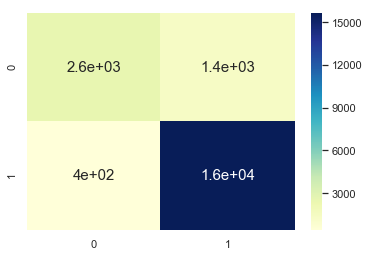

In [45]:
import seaborn as sns; sns.set()
cnf_matrix = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(cnf_matrix)

#sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="YlGnBu")# font size and colors selection.

**ROC AUC curve**

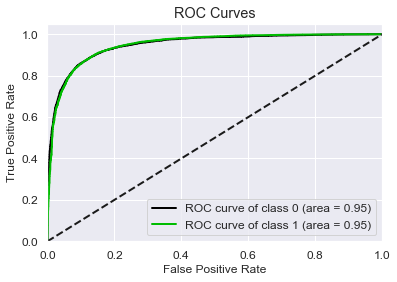

In [46]:
import scikitplot as skplt

LR_optimal = LogisticRegression(C=model.best_params_['C'], penalty='l1').fit(X_train, y_train)

predicted_probas = LR_optimal.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas, plot_micro=False, plot_macro=False)
plt.show()

## 2.1. Feature importance for both positive and negative features.

### Top 25 TFIDF.

In [47]:
def show_most_informative_features(vectorizer, clf, n=25):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print ("\tTop {} Negative features\tTop {} Positive features".format(n, n))
    print ("\t------------------------\t------------------------")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [48]:
show_most_informative_features(tf_idf_vect, LR_optimal, n=25)

	Top 25 Negative features	Top 25 Positive features
	------------------------	------------------------
	-19.0221	worst          		37.2340	excel          
	-17.9811	cancel         		19.9271	delici         
	-17.0697	two star       		18.5766	best           
	-17.0412	cant good      		15.8967	awesom         
	-16.4049	absolut worst  		14.0629	amaz           
	-15.6498	dont recommend 		13.9644	addict         
	-15.5485	terribl        		13.5129	bag suppos     
	-15.2761	usual love     		13.3555	great          
	-14.7813	flavor defin   		12.2829	yummi          
	-14.6397	search continu 		12.1793	love           
	-14.4238	better luck    		11.9104	sever tea      
	-14.3956	best scale     		11.5227	fantast        
	-14.3891	way sweet      		11.4017	may sure       
	-13.5927	minut birthday 		11.1817	youll like     
	-13.5088	blech          		10.9676	much say       
	-13.4778	prefer dijon   		10.9304	wont disappoint
	-13.4498	canist coupl   		10.7637	return got     
	-13.2751	better dinner  		10.6

# 3. CV on Standardized data for Avg W2V.

In [49]:
openPickleFile("X_train")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000,)
object


In [50]:
openPickleFile("X_test")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000,)
object


**W2V training of X_train**

In [51]:
# Train your own Word2Vec model using only X_train corpus.
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

i=0
list_of_sent=[]
for sent in X_train:
    list_of_sent.append(sent.split())

C:\Users\avinash\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [52]:
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [53]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  11337
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'day', 'thirti', 'someth', 'use', 'seri', 'song', 'student', 'teach', 'preschool', 'turn']


In [54]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 80000/80000 [01:27<00:00, 918.85it/s]


80000
50


In [55]:
# Data-preprocessing: Standardizing the data
standardized_avg_w2v_train = StandardScaler().fit_transform(sent_vectors)

#Storing the standardized data into a pickle file for future use.
savePickleFile(standardized_avg_w2v_train, "X_train_AVG_W2V_vectors")

**Vectorization of X_test**

In [56]:
# Training X_cv using X_train model.
i=0
list_of_sent=[]
for sent in X_test:
    list_of_sent.append(sent.split())

In [57]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 20000/20000 [00:23<00:00, 869.04it/s]


20000
50


**Standardization of W2V of X_test**

In [58]:
# Data-preprocessing: Standardizing the data
standardized_avg_w2v_test = StandardScaler().fit_transform(sent_vectors)

#Storing the standardized data into a pickle file for future use.
savePickleFile(standardized_avg_w2v_test, "X_test_AVG_W2V_vectors")

In [59]:
openPickleFile("X_train_AVG_W2V_vectors")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000, 50)
float64


In [60]:
openPickleFile("X_test_AVG_W2V_vectors")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000, 50)
float64


**RandomizedSearchCV**

In [61]:
y_train =y_train.astype(float)

In [62]:
y_train.dtype

dtype('float64')

In [63]:
time_start = time.time()

tuned_parameters = {'C': [10**i for i in range(-4,4,1)]} #params should be passed as a dict not as list of dict.

#Using RandomizedSearchCV
model =  RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5, n_jobs=6, random_state = 12, n_iter=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

print ('CV for Unigrams in range(10e-4, 10e+4) done! Time elapsed: {} seconds'.format(time.time()-time_start))

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9221081128799695
CV for Unigrams in range(10e-4, 10e+4) done! Time elapsed: 12.878559350967407 seconds


In [64]:
#print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % (time() - start, len(results['params'])))
report(model.cv_results_)

Model with rank: 1
Mean validation score: 0.940 (std: 0.001)
Parameters: {'C': 0.01}

Model with rank: 2
Mean validation score: 0.940 (std: 0.001)
Parameters: {'C': 100}

Model with rank: 3
Mean validation score: 0.940 (std: 0.001)
Parameters: {'C': 1}



In [65]:
# ============================== Logistic Regression with C = optimal_C ===============================================
# evaluate CV accuracy
optimal_cv_result = max(model.cv_results_['mean_test_score'])
acc = optimal_cv_result * float(100)
print('\nThe CV F1 score of the Logistic Regression is %f%%' % (acc))

# evaluate accuracy
acc = model.score(X_test, y_test) * 100
print('\nThe Test F1 score of the Logistic Regression for C = %f is %f%%' % (model.best_params_['C'], acc))


The CV F1 score of the Logistic Regression is 94.043473%

The Test F1 score of the Logistic Regression for C = 0.010000 is 92.210811%


**Precision, Recall and F1 score report**

In [66]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.87      0.65      0.74      3943
    class 1       0.92      0.98      0.95     16057

avg / total       0.91      0.91      0.91     20000



**Confusion matrix**

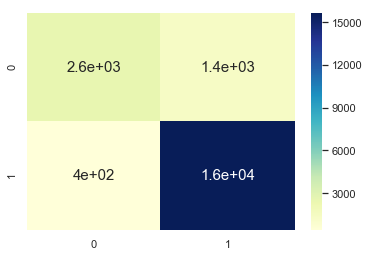

In [67]:
import seaborn as sns; sns.set()
cnf_matrix = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(cnf_matrix)

#sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="YlGnBu")# font size and colors selection.

**ROC AUC curve**

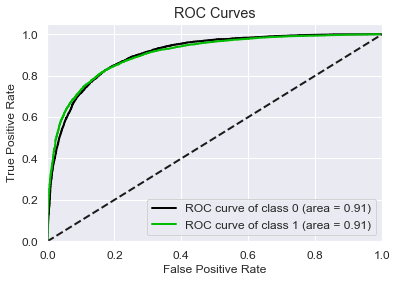

In [68]:
import scikitplot as skplt

LR_optimal = LogisticRegression(C=model.best_params_['C'], penalty='l1').fit(X_train, y_train)

predicted_probas = LR_optimal.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas, plot_micro=False, plot_macro=False)
plt.show()

## 3.1. Feature importance for both positive and negative features.

### Top 25 AVG W2V.

In [69]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = w2v_words
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print ("\tTop {} Negative features\tTop {} Positive features".format(n, n))
    print ("\t------------------------\t------------------------")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [70]:
show_most_informative_features(w2v_model, LR_optimal, n=25)

	Top 25 Negative features	Top 25 Positive features
	------------------------	------------------------
	-0.5161	song           		0.4510	show           
	-0.4900	book           		0.4009	year           
	-0.4394	still          		0.3322	love           
	-0.3847	preschool      		0.3274	hes            
	-0.3731	televis        		0.3103	laugh          
	-0.3627	sing           		0.2998	rememb         
	-0.3579	use            		0.2885	india          
	-0.3014	silli          		0.2657	will           
	-0.2971	turn           		0.2574	seri           
	-0.2389	air            		0.2446	abl            
	-0.1928	learn          		0.2409	alway          
	-0.1580	word           		0.2200	bought         
	-0.1100	student        		0.2184	colleg         
	-0.0619	loud           		0.2104	ago            
	-0.0233	bet            		0.1916	car            
	-0.0163	someth         		0.1853	sister         
	-0.0023	thirti         		0.1642	see            
	0.0000	day            		0.1536	son            
	0.0000	drive    

# 4. CV on Standardized data for TFIDF-Avg W2V.

In [71]:
openPickleFile("X_train")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000,)
object


In [72]:
openPickleFile("X_test")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000,)
object


**Training of X_train for TFIDF**

In [73]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
fit = model.fit(X_train)
tf_idf_matrix = fit.transform(X_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

**Training of X_train for TFIDF AVGW2V**

In [74]:
# To get the list of sent for X_train
i=0
list_of_sent=[]
for sent in X_train:
    list_of_sent.append(sent.split())

In [75]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf values of word in this review
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 80000/80000 [01:41<00:00, 787.05it/s]


**Standardization of TFIDF AvgW2V of X_train**

In [76]:
# Data-preprocessing: Standardizing the data
standardized_tfidf_avg_w2v_train = StandardScaler().fit_transform(tfidf_sent_vectors)

#Storing the standardized_tfidf_sent_vectors_array data into a pickle file for future use.
savePickleFile(standardized_tfidf_avg_w2v_train, "X_train_TFIDF_AvgW2V")

**Transformation of X_test for TFIDF**

In [77]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tf_idf_matrix = fit.transform(X_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

**Training of X_test for TFIDF AVGW2V**

In [78]:
# Training X_cv using X_train model.
i=0
list_of_sent=[]
for sent in X_test:
    list_of_sent.append(sent.split())

In [79]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf values of word in this review
            tf_idf = dictionary[word]*sent.count(word)
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 20000/20000 [00:26<00:00, 750.31it/s]


**Standardization of TFIDF AvgW2V of X_test**

In [80]:
# Data-preprocessing: Standardizing the data
standardized_tfidf_avg_w2v_test = StandardScaler().fit_transform(tfidf_sent_vectors)

#Storing the standardized_tfidf_sent_vectors_array data into a pickle file for future use.
savePickleFile(standardized_tfidf_avg_w2v_test, "X_test_TFIDF_AvgW2V")

In [81]:
openPickleFile("X_train_TFIDF_AvgW2V")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000, 50)
float64


In [82]:
openPickleFile("X_test_TFIDF_AvgW2V")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000, 50)
float64


**RandomizedSearchCV**

In [83]:
y_train =y_train.astype(float)

In [84]:
y_train.dtype

dtype('float64')

In [85]:
time_start = time.time()

tuned_parameters = {'C': [10**i for i in range(-4,4,1)]} #params should be passed as a dict not as list of dict.

#Using RandomizedSearchCV
model =  RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5, n_jobs=6, random_state = 12, n_iter=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

print ('CV for TFIDF AVG W2V in range(10e-4, 10e+4) done! Time elapsed: {} seconds'.format(time.time()-time_start))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9135435776477098
CV for TFIDF AVG W2V in range(10e-4, 10e+4) done! Time elapsed: 14.65281343460083 seconds


In [86]:
#print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % (time() - start, len(results['params'])))
report(model.cv_results_)

Model with rank: 1
Mean validation score: 0.935 (std: 0.002)
Parameters: {'C': 100}

Model with rank: 2
Mean validation score: 0.935 (std: 0.002)
Parameters: {'C': 1}

Model with rank: 3
Mean validation score: 0.934 (std: 0.002)
Parameters: {'C': 0.01}



In [87]:
# ============================== Logistic Regression with C = optimal_C ===============================================
optimal_cv_result = max(model.cv_results_['mean_test_score'])
acc = optimal_cv_result * float(100)
print('\nThe CV F1 score of the Logistic Regression is %f%%' % (acc))

# evaluate accuracy
acc = model.score(X_test, y_test) * 100
print('\nThe Test F1 score of the Logistic Regression for C = %f is %f%%' % (model.best_params_['C'], acc))


The CV F1 score of the Logistic Regression is 93.463268%

The Test F1 score of the Logistic Regression for C = 100.000000 is 91.354358%


**Precision, Recall and F1 score report**

In [88]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.87      0.65      0.74      3943
    class 1       0.92      0.98      0.95     16057

avg / total       0.91      0.91      0.91     20000



**Confusion matrix**

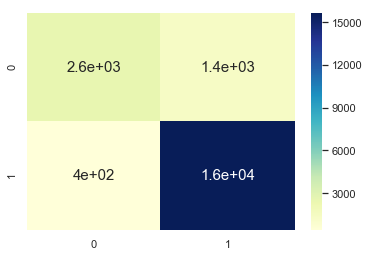

In [89]:
import seaborn as sns; sns.set()
cnf_matrix = confusion_matrix(y_test, pred)

df_cm = pd.DataFrame(cnf_matrix)

#sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 15},cmap="YlGnBu")# font size and colors selection.

**ROC AUC curve**

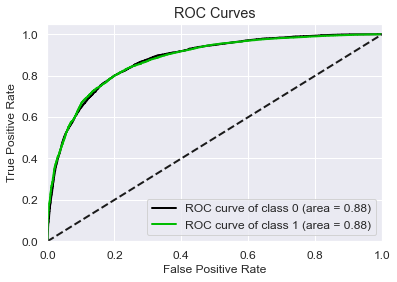

In [90]:
import scikitplot as skplt

LR_optimal = LogisticRegression(C=model.best_params_['C'], penalty='l1').fit(X_train, y_train)

predicted_probas = LR_optimal.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas, plot_micro=False, plot_macro=False)
plt.show()

## 4.1. Feature importance for both positive and negative features.

### Top 20 TFIDF-AVG W2V.

In [91]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = w2v_words
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print ("\tTop {} Negative features\tTop {} Positive features".format(n, n))
    print ("\t------------------------\t------------------------")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [92]:
show_most_informative_features(w2v_model, LR_optimal, n=20)

	Top 20 Negative features	Top 20 Positive features
	------------------------	------------------------
	-0.6118	use            		0.8438	ago            
	-0.6087	song           		0.6534	love           
	-0.4728	book           		0.6196	laugh          
	-0.3898	preschool      		0.5648	make           
	-0.3469	still          		0.5297	son            
	-0.3281	turn           		0.5016	rememb         
	-0.3189	word           		0.4843	seri           
	-0.3080	silli          		0.4550	year           
	-0.2658	droop          		0.4497	show           
	-0.2602	sing           		0.4118	car            
	-0.2500	televis        		0.4049	introduc       
	-0.2303	thirti         		0.3928	alway          
	-0.1853	learn          		0.3808	whale          
	-0.1496	teach          		0.3435	child          
	-0.1328	day            		0.3353	bet            
	-0.1318	later          		0.2696	abl            
	-0.1260	air            		0.2539	along          
	-0.0900	someth         		0.2501	will           
	-0.0649	loud   

# 5. Perturbation testing on Standardized data for BOW Unigrams.

**Logistic Regression on X_train without noise data.**

In [93]:
openPickleFile("X_train")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000,)
object


In [94]:
openPickleFile("X_test")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000,)
object


**Vectorization of X_train**

In [95]:
#BoW for X_train
count_vect = CountVectorizer(dtype=float) #in scikit-learn
fit = count_vect.fit(X_train) #1st fitting X_train for BoW
Bow_unigram_train = fit.transform(X_train) # Then transforming X_train using the calculated fit.
print("the type of count vectorizer ",type(Bow_unigram_train))
print("the shape of out text BOW vectorizer ",Bow_unigram_train.get_shape())
print("the number of unique words ", Bow_unigram_train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (80000, 33484)
the number of unique words  33484


In [96]:
standardized_bigram_train = MaxAbsScaler().fit_transform(Bow_unigram_train)

#saving unigram sparse matrix.
savePickleFile(standardized_bigram_train, "X_train_unigram_sparse")

In [97]:
# Adding noise to vectorized sparse matrix.
noise = 10e-5
standardized_bigram_train.data = standardized_bigram_train.data + noise

In [98]:
Bow_unigram_X_train_with_noise = standardized_bigram_train #storing the vectorized training data for later use.

In [99]:
#saving unigram sparse matrix.
savePickleFile(Bow_unigram_X_train_with_noise, "X_train_unigram_sparse+noise")

**Transformation of X_test**

In [100]:
#BoW for X_test
final_counts_test = fit.transform(X_test) # Then transforming X_train using the calculated fit.
print("the type of count vectorizer ",type(final_counts_test))
print("the shape of out text BOW vectorizer ",final_counts_test.get_shape())
print("the number of unique words ", final_counts_test.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (20000, 33484)
the number of unique words  33484


In [101]:
standardized_unigram_train = MaxAbsScaler().fit_transform(final_counts_test)
standardized_unigram_train

<20000x33484 sparse matrix of type '<class 'numpy.float64'>'
	with 623023 stored elements in Compressed Sparse Row format>

In [102]:
#saving unigram sparse matrix.
savePickleFile(standardized_unigram_train, "X_test_unigram_sparse")

In [103]:
openPickleFile("X_train_unigram_sparse")
X_train = temp
print(X_train.shape)
print(X_train.dtype)

(80000, 33484)
float64


In [104]:
openPickleFile("X_test_unigram_sparse")
X_test = temp
print(X_test.shape)
print(X_test.dtype)

(20000, 33484)
float64


**RandomizedSearchCV**

In [105]:
y_train =y_train.astype(float)

In [106]:
y_train.dtype

dtype('float64')

In [107]:
time_start = time.time()

tuned_parameters = {'C': [10**i for i in range(-4,4,1)]} #params should be passed as a dict not as list of dict.

#Using RandomizedSearchCV
model =  RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5, n_jobs=6, random_state = 12, n_iter=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

print ('CV for Unigrams in range(10e-4, 10e+4) done! Time elapsed: {} seconds'.format(time.time()-time_start))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9411049656597581
CV for Unigrams in range(10e-4, 10e+4) done! Time elapsed: 22.254483222961426 seconds


In [108]:
#print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % (time() - start, len(results['params'])))
report(model.cv_results_)

Model with rank: 1
Mean validation score: 0.952 (std: 0.001)
Parameters: {'C': 1}

Model with rank: 2
Mean validation score: 0.943 (std: 0.003)
Parameters: {'C': 100}

Model with rank: 3
Mean validation score: 0.922 (std: 0.000)
Parameters: {'C': 0.01}



In [109]:
#To find out w for optimal C.
clf = LogisticRegression(C=model.best_params_['C'], penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_

In [110]:
print(np.count_nonzero(w))

2564


In [111]:
w = w + 10e-6
w

array([[1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05]])

**Logistic Regression on X_train + noise data.**

In [112]:
openPickleFile("X_train_unigram_sparse+noise")
X_train_noise = temp
print(X_train_noise.shape)
print(X_train_noise.dtype)

(80000, 33484)
float64


In [113]:
clf1 = LogisticRegression(C=model.best_params_['C'], penalty='l1');
clf1.fit(X_train_noise, y_train);
w1 = clf1.coef_
print(np.count_nonzero(w1))


2566


In [114]:
w1 = w1 + 10e-6
w1

array([[1.e-05, 1.e-05, 1.e-05, ..., 1.e-05, 1.e-05, 1.e-05]])

In [115]:
change_in_w = ((abs((w - w1)/w))*100)
#change_in_w = change_in_w - 100
change_in_w = change_in_w[np.nonzero(change_in_w)]
change_in_w.shape

(2567,)

In [116]:
change_in_w = change_in_w[change_in_w != np.nan]
change_in_w

array([0.06633815, 0.27348873, 0.01408889, ..., 0.07491413, 0.00286478,
       0.25673152])

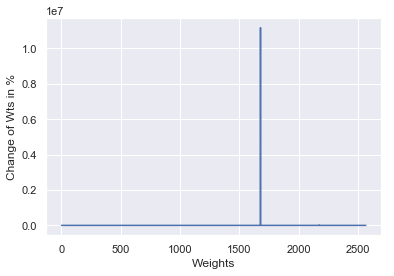

In [117]:
#Elbow curve to decide threshold % change in weights.
plt.figure()
plt.plot(change_in_w)
plt.xlabel("Weights")
plt.ylabel("Change of Wts in %")
plt.show()

In [118]:
#To get the indices of the features exceeding the threshold % change in weight.
indices = []
threshold = 20
for i, j in enumerate(change_in_w):
    if j >= threshold:
        indices.append(i)


In [119]:
print(indices)

[115, 164, 204, 311, 411, 469, 596, 832, 925, 966, 991, 1472, 1580, 1599, 1678, 1729, 2174]


**Multicolinearity testing for features exceeding threshold change in weight.**

In [120]:
features_exceeding_threshold = np.take(count_vect.get_feature_names(), indices)
print(features_exceeding_threshold)

['abuela' 'accross' 'acidifi' 'adkin' 'afficianado' 'aftershav' 'ajar'
 'also' 'amazom' 'americolor' 'amo' 'arctic' 'arteri' 'artisian'
 'asperagus' 'astragalus' 'banilla']


## 5.1. Feature importance for both positive and negative features.

### Top 25 Unigrams.

In [121]:
LR_optimal = LogisticRegression(C=model.best_params_['C'], penalty='l1').fit(Bow_unigram_train, y_train)

In [122]:
def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    print ("\tTop 25 Negative features\tTop 25 Positive features")
    print ("\t------------------------\t------------------------")
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2))

In [123]:
show_most_informative_features(count_vect, LR_optimal, n=25)

	Top 25 Negative features	Top 25 Positive features
	------------------------	------------------------
	-6.1367	distrust       		5.3587	overdos        
	-4.9179	schar          		3.3927	collard        
	-4.8443	bronchial      		3.3336	elev           
	-4.5556	patchi         		3.2047	zinc           
	-4.2023	compass        		3.1933	sunday         
	-4.1445	weakest        		3.1792	juicier        
	-3.6519	parampara      		3.1033	deduct         
	-3.3526	tao            		3.0016	ramun          
	-3.3391	nome           		2.9927	rash           
	-3.3364	monosodium     		2.9132	obsess         
	-3.2324	boyarde        		2.8950	graze          
	-3.0533	worst          		2.8075	skeptic        
	-2.9714	cub            		2.7280	oval           
	-2.8364	unapp          		2.6933	conceal        
	-2.8117	beani          		2.6798	amus           
	-2.7954	emptor         		2.6539	mccann         
	-2.7946	glutano        		2.6505	dum            
	-2.7860	cucazza        		2.4701	whack          
	-2.7655	gigant 

# 6. Sparsity check for increasing value of Lambda.

In [124]:
# More Sparsity (Fewer elements of W* being non-zero) by increasing Lambda (decreasing C or increasing Lambda) 

import numpy as np
w_non_zero = []
sparsity = []
C = [10**i for i in range(-4,1)]
for i in C:
    clf = LogisticRegression(C=i, penalty='l1')# Sparsity check only for L1 regularizer, as with L2 regularization sparsity doesn't change.
    clf.fit(X_train, y_train)
    w = clf.coef_
    w_non_zero.append(np.count_nonzero(w))
    rows, columns = w.shape
    sparsity.append(columns - np.count_nonzero(w))

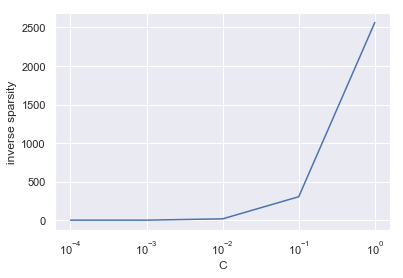

In [125]:
# plot C vs inverse sparsity
plt.plot(C, w_non_zero)

#for xy in zip(C, w_non_zero):
    #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('inverse sparsity')
plt.show()

**Conclusion:**
1. As C value increases sparsity decreases,or as Lambda value decreases sparsity also decreases.

# 7. Conclusions

| A.| Vectorizer   | Model        | Hyperparameter| Train F1       |Test F1       |
|---|--------------|--------------|---------------|----------------|--------------|
| 1.| BOW(Bigrams) | LR           | C = 1         | 95.534483%     | 94.652843%   |
| 2.| TFIDF        | LR           | C = 100       | 95.753395%     | 94.897588%   |
| 3.| Avg W2V      | LR           | C = 100       | 94.043473%     | 92.210811%   |
| 4.| TFIDF Avg W2V| LR           | C = 1         | 93.463268%     | 91.354358%   |